#### Programa de Formación en ML & DS
## Introducción al Aprendizaje Automático
# Sesión 8: Taller de Clasificación usando Imágenes 

In [1]:
!pip install tabulate

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
import os


# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',np.int(classes[0]),classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

In [0]:
from skimage.feature import hog
from skimage import data, color, exposure
from PIL import ImageOps, Image
from sklearn.ensemble import RandomForestClassifier

def extract_histo(img):
    values_r, _ = np.histogram(img[:,:,0].ravel(), bins=256, range=(0.0, 256))
    values_g, _ = np.histogram(img[:,:,1].ravel(), bins=256, range=(0.0, 256))
    values_b, _ = np.histogram(img[:,:,2].ravel(), bins=256, range=(0.0, 256))
    return np.concatenate((values_r, values_g, values_b))

def extract_pixels(img, flatten=True):
    t_img = Image.fromarray(img)

    new_width  = 224
    new_height = 224
    test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS)
    test_img = test_img.convert('L')
    if flatten:
        return np.array(test_img).flatten()
    return np.array(test_img)

def extract_hog(img):
    t_img = Image.fromarray(img)

    new_width  = 224
    new_height = 224
    test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS) #
    image = color.rgb2gray(np.array(test_img))

    fd = hog(image, orientations=8, pixels_per_cell=(28, 28),
                    cells_per_block=(1, 1), visualise=False)
    return fd

In [0]:
!pip install pydrive

     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
file_list = drive.ListFile({'q': "'1xnD90n2DNZDeCldJj6q_hqLow43TbTKB' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: mnist-original.mat, id: 1bj4r9e5dln5hquo2v0EJWNcJac_jtcbd
title: birds_f_numbers.txt, id: 1ZoRzgHiKEHHY2LgqGiD9Zs-34ZwB02Kr
title: birds, id: 1X8Uxqz-rvN33FHCTxUD-xUsCm4ANO18o
title: scene_categories, id: 1BPOxgRvgFLpSJ4SR7bhGmX_RYL4XegEw


In [0]:
file_list = drive.ListFile({'q': "'1X8Uxqz-rvN33FHCTxUD-xUsCm4ANO18o' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: mandarin, id: 1qG0VFPz58FYZi_V4rFtBNekIP4f3Glvn
title: owl, id: 169MXYlQfF2MBQ703pJVbqTmc0TwEzZHY
title: egret, id: 1xfSh0zZHK6YfmMrFrYbXcOjW-NQquV2E
title: wood_duck, id: 18XsEoplXnvcJ4hIP26evBFJBAKQuQL5Q
title: toucan, id: 1KQXX7F7kBNLV8hn-elZsYP11J4FAT2SI
title: puffin, id: 12tsdXppoirVYvgopvyG-wGqbRX4rooMP


In [0]:
file_list = drive.ListFile({'q': "'169MXYlQfF2MBQ703pJVbqTmc0TwEzZHY' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: owl100.jpg, id: 1-TEPLX33Cpo-Bs4YRo7Diy61Vlmv2O7n
title: owl099.jpg, id: 1KJOsfjvIyjV65jT_vceFeKK1Svn66Bip
title: owl098.jpg, id: 1OjtEHJdrDgKAWkAtny47UxMVjN7YYU2b
title: owl097.jpg, id: 1hag9Sh0BbwKO1XQv3M8X0TBBrKH7Ufkm
title: owl096.jpg, id: 1c6D-5riCaTbzeWRn1NSpuVIvuHwa24_y
title: owl084.jpg, id: 1qzIJ0KBvnGAx0fVQd1eXh4l4LwW1xYAL
title: owl095.jpg, id: 17xn7P7WEF77RGaCPI0FufjB3lonJHd5B
title: owl094.jpg, id: 165fhaG60gN7Wnpq8z7vC01UJbXhpm3f-
title: owl093.jpg, id: 1i6CfE_ZZsmJD359kJsy9HtXeicyT1DIH
title: owl083.jpg, id: 1rXb5019rjsQ2WlHJAJCxEg2jllvgQanh
title: owl089.jpg, id: 1YePfboWwGiHPH6kqPQSAoBjyjJ4_36Yr
title: owl088.jpg, id: 1fwA6jfUxVoZK6vnsnsKm7hppuTYExKR-
title: owl082.jpg, id: 1wAEAYK8Dgoq975Nu_Mw4OoZPg24KlaPt
title: owl086.jpg, id: 1zVae5vzjNjKlRqvzgeQAPHIpWIwv7r2W
title: owl092.jpg, id: 1QXFJVgxg-jaaPDDdNFsn75lMD8CwVoTs
title: owl087.jpg, id: 1iirrPm8CBviAzKRgk1bOYqfXGgSVVZPd
title: owl091.jpg, id: 1fVcH6FwVZvHEO4D2FNeUY_21FZa6m4Hs
title: owl090.jpg, id: 186zGAQs

In [0]:
image_owl = drive.CreateFile({'id': '1-TEPLX33Cpo-Bs4YRo7Diy61Vlmv2O7n'})
image_owl.GetContentFile('owl001.jpg')
img=mpimg.imread('owl001.jpg')

En esta segunda parte vamos a trabajar usando un par de conjuntos de clasificación un poco más complicados. A continuación trabajaremos con el conjunto de datos `birds`. `Birds` contiene las imágenes de 600 aves que pertenecen a 6 especies. Cada una con 100 imágenes.

In [0]:
imgplot = plt.imshow(img)

Armamos el conjunto de datos:

In [0]:
birds_file = drive.CreateFile({'id': '1ZoRzgHiKEHHY2LgqGiD9Zs-34ZwB02Kr'})
birds_file.GetContentFile('birds_f_numbers.txt')

with open('birds_f_numbers.txt', 'r') as f:
    f = f.readlines()

In [0]:
bird_classes = ['egr', 'man', 'owl', 'puf', 'tou', 'wod']

In [0]:
train_test_indices = [x.strip() for x in f[7:]]
train_test_indices = [x for x in train_test_indices if len(x)>0]

Clases

In [0]:
class_to_ix = {cls:i for i, cls in enumerate(bird_classes)}

print(class_to_ix)

{'egr': 0, 'man': 1, 'owl': 2, 'puf': 3, 'tou': 4, 'wod': 5}


In [0]:
train_files = []
val_files = []
test_files = []
y_train = []
y_val = []
y_test = []


for i, idx_class in zip(range(0, 606, 101), bird_classes):
    bird_class = train_test_indices[i]
    train_files.extend([os.path.join(os.getcwd(), 
                              'data', 
                              'birds', 
                              bird_class, 
                              idx_class + train_test_indices[x].zfill(3) + '.jpg') for x in range(i+1, i+21, 1)])
    y_train.extend([class_to_ix[idx_class]]*20)
    val_files.extend([os.path.join(os.getcwd(), 
                              'data', 
                              'birds', 
                              bird_class, 
                              idx_class + train_test_indices[x].zfill(3) + '.jpg') for x in range(21+i, i+51, 1)])
    y_val.extend([class_to_ix[idx_class]]*30)
    test_files.extend([os.path.join(os.getcwd(), 
                              'data', 
                              'birds', 
                              bird_class, 
                              idx_class + train_test_indices[x].zfill(3) + '.jpg') for x in range(51+i, i+101, 1)])
    y_test.extend([class_to_ix[idx_class]]*50)

In [0]:
train = [mpimg.imread(filename) for filename in train_files]
val = [mpimg.imread(filename) for filename in val_files]
test = [mpimg.imread(filename) for filename in test_files]

FileNotFoundError: ignored

Definimos una función para transformar cualquier imagen a escala de grises

In [0]:
import cv2
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

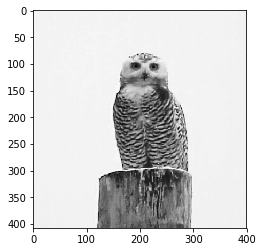

In [0]:
imgplot = plt.imshow(to_gray(img), cmap='gray')

También será útil una función que permita escalar las imágenes

Cambie `fun` por la función de extracción de características deseada

# Extracción de características

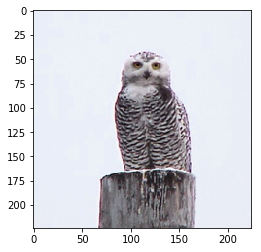

In [0]:
from PIL import Image 
t_img = Image.fromarray(img)

new_width  = 224
new_height = 224
test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS)

plt.imshow(test_img)

In [0]:
from skimage.feature import hog
from skimage import data, color, exposure
from PIL import ImageOps, Image
from sklearn.ensemble import RandomForestClassifier

def extract_histo(img):
    values_r, _ = np.histogram(img[:,:,0].ravel(), bins=256, range=(0.0, 256))
    values_g, _ = np.histogram(img[:,:,1].ravel(), bins=256, range=(0.0, 256))
    values_b, _ = np.histogram(img[:,:,2].ravel(), bins=256, range=(0.0, 256))
    return np.concatenate((values_r, values_g, values_b))

def extract_pixels(img, flatten=True):
    t_img = Image.fromarray(img)

    new_width  = 224
    new_height = 224
    test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS)
    test_img = test_img.convert('L')
    if flatten:
        return np.array(test_img).flatten()
    return np.array(test_img)

def extract_hog(img):
    t_img = Image.fromarray(img)

    new_width  = 224
    new_height = 224
    test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS) #
    image = color.rgb2gray(np.array(test_img))

    fd = hog(image, orientations=8, pixels_per_cell=(28, 28),
                    cells_per_block=(1, 1), visualise=False)
    return fd

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


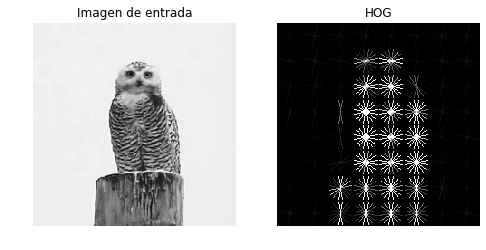

In [0]:
from skimage.feature import hog
from skimage import data, color, exposure


image = color.rgb2gray(np.array(test_img))

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(28, 28),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Imagen de entrada')
ax1.set_adjustable('box-forced')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')
ax1.set_adjustable('box-forced')
plt.show()

In [0]:
print('Tamaño vector de características: {}'.format(fd.shape))

Tamaño vector de características: (512,)


In [0]:
fun = extract_pixels

X_train = np.array([fun(img) for img in train])

NameError: ignored

In [0]:
X_val = np.array([fun(img) for img in val])
X_test = np.array([fun(img) for img in test])

NameError: ignored

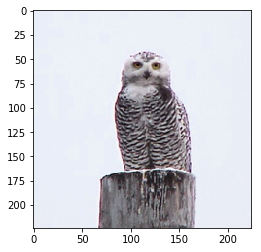

In [0]:
from PIL import Image 
t_img = Image.fromarray(img)

new_width  = 224
new_height = 224
test_img = ImageOps.fit(t_img, (new_width, new_height), Image.ANTIALIAS)

plt.imshow(test_img)

In [0]:
X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))

NameError: ignored

In [0]:
print(X.shape)
print(X_test.shape)

NameError: ignored

In [0]:
#clf = RandomForestClassifier(n_estimators=50, max_features=0.15, n_jobs=-1)
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [0]:
clf.fit(X, y)

NameError: ignored

In [0]:
clf.score(X_test, y_test)

NameError: ignored

# RandomizedSearchCV

Exploremos el número de características usadas por RandomForest.

In [0]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randfloat
from scipy.stats import randint as sp_randint

#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

param_dist = {"max_features": sp_randfloat()}

clf = RandomForestClassifier(n_estimators=100)

#n_iter_search = 40
n_iter_search = 5

random_search = RandomizedSearchCV(clf, random_state=42, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, 
                                   n_jobs=-1, verbose=2)

random_search.fit(X, y)
random_search.score(X_test, y_test)

NameError: ignored

Accuracy reportado:

* PIXELS = 41%
* HOG = 47%
* HISTO = 35%

# Taller

Vamos a usar el conjunto de datos `scene_categories`, el cual contiene imágenes de 15 escenarios como suburbios, zonas industirales, habitaciones, entre otros. El objetivo consiste en comparar las tres estrategias de extracción de características observadas:

* Cargue el conjunto de datos `scene_categories`.
* Verifique que haya cargado 4485 imágenes que pertenecen al conjunto de datos.
* Use `plt.imshow()` para visualizar un par de imágenes y verificar que se hayan cargado exitosamente los conjuntos de datos.
* Grafique la distribución de etiquetas del conjunto de datos.
* Particione el conjunto de datos de tal forma que quede 70% para entrenamiento y 30% para prueba. Haga la partición estratificada.
* Compare los 3 métodos de extracción de características usando un RandomForest con las siguientes características:
```python
RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
```
    * Para HOG: use exactamente la misma función descrita arriba. Es decir, con un tamaño de parche de 28x28.
* ¿Cuál estrategia funciona mejor? ¿Por qué cree?

# Solución

Cargar el conjunto de datos scene_categories